## UNIVARIATE STATISTICS ANALYSIS
***
- Most of the univariate statistics are based on the linear model which is one of the main model in machine learning.

### Refer this befire going ahead:
### Normal Distribution
The normal distribution, noted 𝒩 (𝜇, 𝜎) with parameters: 𝜇 mean (location) and 𝜎 > 0 std-dev. Estimators: 𝑥¯ and 𝜎𝑥.

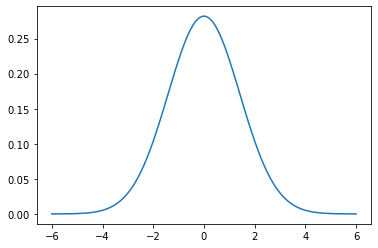

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

mu = 0 #mean
var = 2 #variance
sigma = np.sqrt(var) # standard deviation

x = np.linspace(mu-3*var,mu+3*var,100)
plt.plot(x,norm.pdf(x,mu,sigma))
plt.show()

**Observations**

- mean = 0
-  variance = 2 (dispersion of the plot)
- sigma = standard deviation\n
- The orginal Normal distribution plot look like this way.

### Binomial Distribution

0.01760010010885238


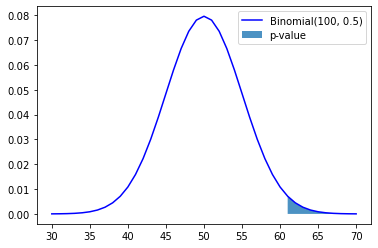

In [6]:
import scipy.stats
import matplotlib.pyplot as plt

success = np.linspace(30, 70, 41)
plt.plot(success, scipy.stats.binom.pmf(success, 100, 0.5), 'b-', label="Binomial(100, 0.5)")
upper_success_tvalues = success[success > 60]
plt.fill_between(upper_success_tvalues, 0, scipy.stats.binom.pmf(upper_success_tvalues, 100,0.5), alpha=.8, label="p-value")
plt.legend()
pval = 1 - scipy.stats.binom.cdf(60, 100, 0.5)
print(pval)

**Observations**
- The Binomial distribution plot with P-value.

## Univariate Analysis Plots
**Quantitative**
- Kernel Density Plot
- Histogram
- Box Plot

**Categorical**
- Bar Chart
- Pie Chart

## Case Study: Ammonia Data
## Ammonia concentration

Description: The ammonia concentration in a liquid stream, measured every 6 hours, from a waste water treatment unit.

Data source: Simulated, but made to represent an actual problem.

In [7]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series,DataFrame

In [8]:
ammonia = pd.read_csv('ammonia.csv')
ammonia.head()

,Ammonia
0,35.00
1,40.66
2,41.05
3,32.29
4,35.59


In [9]:
print("Shape of Ammonia Dataset is :", ammonia.shape)

Shape of Ammonia Dataset is : (1440, 1)


In [10]:
ammonia.describe()

,Ammonia
count,1440.000000
mean,36.094993
std,8.518928
min,9.990000
25%,30.225000
50%,36.180000
75%,42.370000
max,58.740000


In [11]:
ammonia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ammonia  1440 non-null   float64
dtypes: float64(1)
memory usage: 11.4 KB


## Univariate Analysis for Quantitative
**Kernel Density Plot**

A density plot shows the distribution of a numerical variable. It takes only set of numeric values as input. It is really close to a histogram. Since it is a really common dataviz technique.

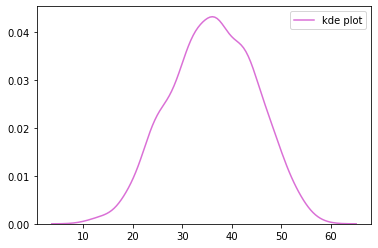

In [12]:
sns.distplot(ammonia,hist=False, color='orchid', label='kde plot')
plt.show()

**Observations**
- The plotted kernel density distribution of ammonia dataset is more of symmetrical distibution.

**Histograms**

Histograms are similar to density plots; hist function already exists in matplotlib. A histogram represents the distribution of data by forming bins along the range of the data and then drawing bars to show the number of observations that fall in each bin.

**Method 1**

Check the skeweness in histogram.

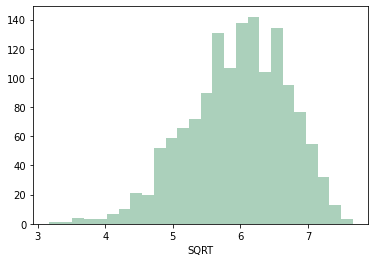

In [13]:
# Taking square root of data points
ammonia['SQRT'] = np.sqrt(ammonia['Ammonia'])

# SQRT_transformed histogram of data
sns.distplot(ammonia['SQRT'], kde=False, color='seagreen')
plt.show()

Apply log_transformation to reduce skeweness.

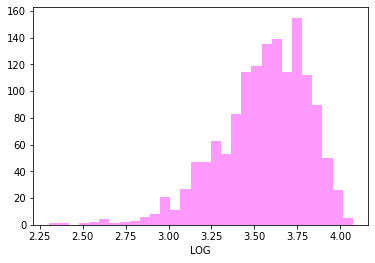

In [15]:
# Get the log of the data
ammonia['LOG'] = np.log(ammonia['Ammonia'])
# Plot histogram
sns.distplot(ammonia['LOG'], kde=False, color='magenta')
plt.show()   

Check skweness in data reduced or not using density plot. Also, note your observations.

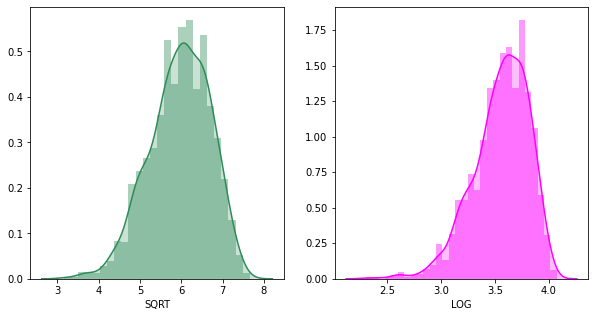

In [16]:
amo1, ax = plt.subplots(1,2, figsize=(10,5)) # mo1 is identifier saved for this graph
sns.distplot(ammonia['SQRT'],color='seagreen', ax=ax[0], kde_kws={'shade':True})
sns.distplot(ammonia['LOG'], color='magenta', ax=ax[1], kde_kws={'shade':True})
plt.show() 

**Observations**
- The two plotted distibutions after applying square root and log to the raw data.
- Skewness
- The first distribution (square rooted data) is slighlty high peaked compared to distribution of raw data.
- The second distribution (log applied) is slightly more left skewed than the first distribution (square rooted data) and more left skewed than distribution of raw data.
- The skewness is negatively increased.

**Method 2**

Another way to check the Skewness: Read the data again.

In [17]:
Ammonia_2 = pd.read_csv('ammonia.csv')
Ammonia_2.head()

,Ammonia
0,35.00
1,40.66
2,41.05
3,32.29
4,35.59


Density plot for checking the skweness

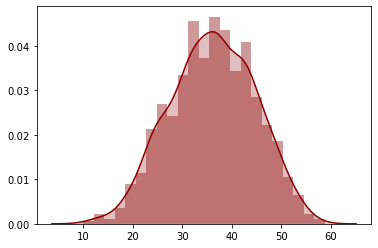

In [18]:
sns.distplot(Ammonia_2, color='darkred', kde_kws={'shade':True})
plt.show()

**Observations**
- The plotted kernel density distribution over ammonia data is symmetrical in nature. 
-  As most of the values lies between 20-50 units
- The symmetrical skewness tells us that the S ~= 0 and mean-median of data is lies near to each other.

Apply log to Reduce Skewness Use Lambda functions.

In [20]:
Ammonia_2['LOG_2'] = Ammonia_2['Ammonia'].apply(lambda x: np.log(x))

Check skweness in data reduced or not using density plot. Also, note your observations.

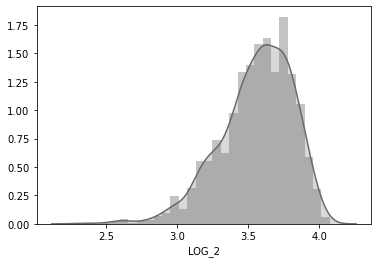

In [21]:
sns.distplot(Ammonia_2['LOG_2'],color='dimgrey', kde_kws={'shade':True})
plt.show()

**Observations**
- The log applied distribution is slightly more left skewed than the raw data distribution.
- The skewness is negatively increased.

**BOXPLOT**

- Boxplot is probably one of the most common type of graphic. It gives a nice summary of one or several numeric variables. The line that divides the box into 2 parts represents the median of the data.

- The end of the box shows the upper and lower quartiles. The extreme lines shows the highest and lowest value excluding outliers. Note that boxplot hides the number of values

In [22]:
Ammonia_3 = pd.read_csv('ammonia.csv')
Ammonia_3.head()

,Ammonia
0,35.00
1,40.66
2,41.05
3,32.29
4,35.59


Check the outliers using Boxplot.

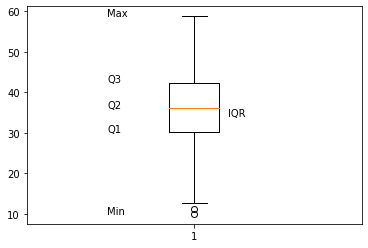

In [23]:
plt.boxplot(Ammonia_3['Ammonia'])

plt.text(0.74,Ammonia_3['Ammonia'].min(),s='Min')
plt.text(0.74,Ammonia_3['Ammonia'].max() ,s='Max')
plt.text(0.74,Ammonia_3['Ammonia'].quantile(0.25),s='Q1')
plt.text(0.74,Ammonia_3['Ammonia'].quantile(0.5),s='Q2')
plt.text(0.74,Ammonia_3['Ammonia'].quantile(0.75),s='Q3')
plt.text(1.10,(Ammonia_3['Ammonia'].quantile(0.5)-2),s='IQR')
plt.show()

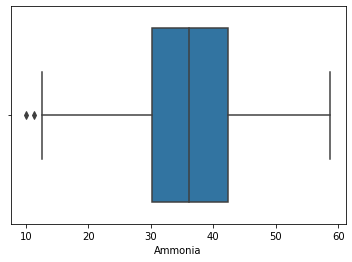

In [24]:
sns.boxplot(Ammonia_3['Ammonia'])
plt.show()

**Observations**
- The boxplot is used to see if any data points are there which lie beyond or below the range (max-min).
- The plotted boxplot over data of ammonia shows two (2) ouliers below the minimum range of data.

Apply log to Reduce Skewness Use Lambda functions.

In [26]:
# Log Transform
Ammonia_3['LOG_3'] = Ammonia_3['Ammonia'].apply(lambda x: np.log(x))

- Log transformation is one of the most popular transformations to deal with skewed data. 
- But we usually ignore this that if the data follows a log-normal distribution.

Check the outliers Removed or not using box plot.

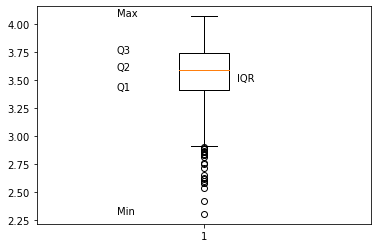

In [27]:
plt.boxplot(Ammonia_3['LOG_3'])

plt.text(0.74, Ammonia_3['LOG_3'].min(), s='Min')
plt.text(0.74, Ammonia_3['LOG_3'].max(), s='Max')
plt.text(0.74, Ammonia_3['LOG_3'].quantile(0.25), s='Q1')
plt.text(0.74, Ammonia_3['LOG_3'].quantile(0.5), s='Q2')
plt.text(0.74, Ammonia_3['LOG_3'].quantile(0.75), s='Q3')
plt.text(1.10, (Ammonia_3['LOG_3'].quantile(0.5)-0.1), s='IQR')
plt.show()

**Observations**
- As we applied a log tranformationover the data and the skewness is increased
- we can see more outliers found below thw minimum range of data.

In [ ]:
## Thank You! Happy Learning!